Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv(r'C:\Users\mxj210016\Desktop\Python_Learning\Projects\Project2_Diabetes Prediction/diabetes.csv') 

In [3]:
pd.read_csv?

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [16]:
scaler = StandardScaler()

In [17]:
standardized_data=scaler.fit_transform(X)

In [24]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [25]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [26]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [29]:
classifier = svm.SVC(kernel='linear')

In [30]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [31]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [33]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [35]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [36]:
y_train=Y_train
y_test=Y_test

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_circles

In [38]:
# Classifiers--------------------------------------------------
clf_LR = LogisticRegression(max_iter=10000).fit(X_train, y_train)
clf_RF = RandomForestClassifier().fit(X_train, y_train)
clf_SVM = SVC().fit(X_train, y_train)
clf_SGD = SGDClassifier().fit(X_train, y_train)
clf_NB = GaussianNB().fit(X_train, y_train)
clf_KNN = KNeighborsClassifier().fit(X_train, y_train)
clf_NN=MLPClassifier(solver='adam', alpha=1e-2,hidden_layer_sizes=(4, 2), max_iter=5000, random_state=0).fit(X_train, y_train)
clf_Ens= EnsembleVoteClassifier(clfs=[clf_LR, clf_RF, clf_SVM, clf_SGD], weights=[1, 1, 1], voting='soft')

class_model={
            'Logistic Regression':clf_LR,
            'Random Forest':clf_RF,
            'SVM':clf_SVM,
            "SGD":clf_SGD,
            'Naive Bayes':clf_NB,
            'KNN':clf_KNN,
            'NN':clf_NN
#             'Ens':clf_Ens
            }

class_score={}

#Model selection comparision--------------------------------------------
for name,model in class_model.items():

    score_test=model.score(X_test, y_test)
    score_train=model.score(X_train, y_train)
    score_cv= cross_val_score(model, X_train, y_train, cv=10, scoring='f1_macro').mean()
    class_score[name]=[score_train, score_cv, score_test]
    
    print("Train: %0.3f" % (float(score_train.round(3))), "CV: %0.3f" % (float(score_cv.round(3))), 
          'Test: %0.3f [%s]' % (float(score_test.round(3)), name))

Train: 0.785 CV: 0.743 Test: 0.760 [Logistic Regression]
Train: 1.000 CV: 0.730 Test: 0.721 [Random Forest]
Train: 0.829 CV: 0.727 Test: 0.727 [SVM]
Train: 0.687 CV: 0.707 Test: 0.656 [SGD]
Train: 0.756 CV: 0.722 Test: 0.773 [Naive Bayes]
Train: 0.829 CV: 0.694 Test: 0.721 [KNN]
Train: 0.777 CV: 0.724 Test: 0.734 [NN]


In [41]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)

# Method1 - defining parameters
SVM__C=[0.001,0.1,10,100,1000, 10000 , 20000]
SVM__C=[10000 , 20000]

SVM__kernel = ['linear', 'poly', 'rbf', 'sigmoid']
SVM__gamma=[0.1,0.01]
SVM__degree=[1, 2 ,3]

param_svm = dict(SVM__C=SVM__C, SVM__kernel=SVM__kernel, SVM__gamma=SVM__gamma, SVM__degree=SVM__degree)

# Method2 - All parameters
parameteres = {'SVM__kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'SVM__C':[0.001,0.1,10,100,1000, 10000 , 20000], 
               'SVM__gamma':['auto', 'scale'], 'SVM__degree':[1, 2 ,3]}

grid_pipe = GridSearchCV(pipeline, param_grid=param_svm, cv=5,n_jobs=4, verbose=10)

grid_pipe.fit(X_train, y_train)

print ("score_train = %3.3f" % (grid_pipe.score(X_train,y_train)))

print ("score_CV= %3.3f" % grid_pipe.best_score_)

print ("score_test = %3.3f" % (grid_pipe.score(X_test,y_test)))

#pparam=pprint.PrettyPrinter(indent=2)

print (grid_pipe.best_params_)

#print ("total time elapsed = %3.3f"%(endT-startT))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   14.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   30.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   31.2s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   44.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  4.2min
[Parallel(

score_train = 0.788
score_CV= 0.782
score_test = 0.773
{'SVM__C': 20000, 'SVM__degree': 1, 'SVM__gamma': 0.1, 'SVM__kernel': 'linear'}


In [42]:
clf_SVM = SVC(C=20000, degree=1, gamma=0.1, kernel= 'linear').fit(X_train, y_train)
score_test=clf_SVM.score(X_test, y_test)
score_train=clf_SVM.score(X_train, y_train)
score_cv= cross_val_score(clf_SVM, X_train, y_train, cv=10, scoring='f1_macro').mean()
print ("score_train = %3.3f" % score_train)

print ("score_CV= %3.3f" % score_cv)

print ("score_test = %3.3f" % score_test)

score_train = 0.785
score_CV= 0.737
score_test = 0.773


In [44]:
s=np.linspace(0.05, 0.3, 10)
scoretest=[]
scoretrain=[]
scorecv=[]
for i, j in enumerate(s):
    print(i,j)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = j, stratify=Y, random_state=1)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf_SVM = SVC(C=20000, degree=1, gamma=0.1, kernel= 'linear').fit(X_train, y_train)
    #clf_SVM = LogisticRegression().fit(X_train, y_train)

    score_test=clf_SVM.score(X_test, y_test)
    score_train=clf_SVM.score(X_train, y_train)
    #score_cv= cross_val_score(clf_SVM, X_train, y_train, cv=3).mean()
    scoretest.append(score_test)
    scoretrain.append(score_train)
    scorecv.append(score_cv)

#     print ("score_train = %3.3f" % score_train)
#     print ("score_CV= %3.3f" % score_cv)
#     print ("score_test = %3.3f" % score_test)

0 0.05
1 0.07777777777777778
2 0.10555555555555556
3 0.13333333333333333
4 0.1611111111111111
5 0.18888888888888888
6 0.21666666666666667
7 0.2444444444444444
8 0.2722222222222222
9 0.3


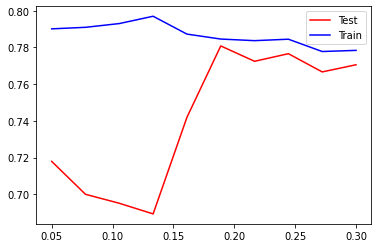

In [45]:
plt.plot(s, scoretest, 'r',label='Test')
#plt.plot(s, scorecv,'k',label='CV')
plt.plot(s, scoretrain,'b',label='Train')
plt.legend()

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(60, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters

batch_size = [4, 8 , 16, 32]
epochs = [100, 200, 500, 600, 700]
batch_size = [16]
epochs = [500]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose=10)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))